In [77]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [78]:
# Get the data for sp500 (2 yrs)
end = dt.datetime.now()
start = end - dt.timedelta(days=365*12)
data = yf.download("^GSPC", start, end)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,1305.050049,1312.239990,1291.979980,1295.219971,1295.219971,4512470000
2012-05-21,1295.729980,1316.390015,1295.729980,1315.989990,1315.989990,3786750000
2012-05-22,1316.089966,1328.489990,1310.040039,1316.630005,1316.630005,4123680000
2012-05-23,1316.020020,1320.709961,1296.530029,1318.859985,1318.859985,4108330000
2012-05-24,1318.719971,1324.140015,1310.500000,1320.680054,1320.680054,3937670000
...,...,...,...,...,...,...
2024-05-08,5168.979980,5191.950195,5165.859863,5187.669922,5187.669922,3842100000
2024-05-09,5189.029785,5215.299805,5180.410156,5214.080078,5214.080078,3727370000
2024-05-10,5225.490234,5239.660156,5209.680176,5222.680176,5222.680176,3617900000


In [79]:
# Calculate the daily returns 
data['returns'] = data['Adj Close'].pct_change()

In [80]:
# Define the buy and hold strategy
data['buy_and_hold'] = (1 + data['returns']).cumprod()

In [81]:
# Define the random positions
data['position'] = np.random.choice([1,0], size=len(data))

In [82]:
# Set the first position to 1
data.loc[data.index[0], 'position'] = 1

In [83]:
# Define the random strategy returns
data['random'] = (1 + data['returns'] * data['position']).cumprod()

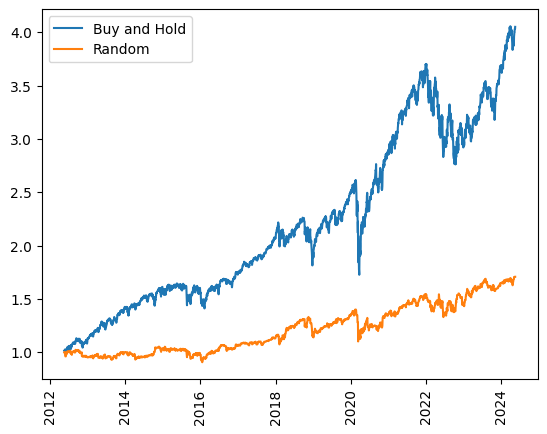

In [84]:
# Plot the two strategies
plt.plot(data['buy_and_hold'], label="Buy and Hold")
plt.plot(data['random'], label='Random')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [85]:
# Show the amount of money you would have after a $1 investment
print("A $1 investment for buying and holding strategy for holding the S&P500 would be $", round(data['buy_and_hold'][-1], 2))
print("A $1 investment for the random trading strategy for holding the S&P500 would be $", round(data['random'][-1], 2))

A $1 investment for buying and holding strategy for holding the S&P500 would be $ 4.05
A $1 investment for the random trading strategy for holding the S&P500 would be $ 1.71


/tmp/ipykernel_6212/1252711258.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("A $1 investment for buying and holding strategy for holding the S&P500 would be $", round(data['buy_and_hold'][-1], 2))
/tmp/ipykernel_6212/1252711258.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("A $1 investment for the random trading strategy for holding the S&P500 would be $", round(data['random'][-1], 2))
